In [2]:
import pandas as pd



# @title Step 1.2 Load the Dataset
# Importing the Google Drive module
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')
# This mounts your Google Drive to the Colab environment, allowing access to stored files.

# Define the file path of the dataset in your Google Drive
file_path = '/content/drive/My Drive/CourseRA/Data/penguins.csv'
# Replace this with the actual path of the dataset in your Google Drive.

# Load the dataset into a pandas DataFrame
penguins = pd.read_csv(file_path).dropna()
# pd.read_csv() reads the CSV file and loads it into a pandas DataFrame for further analysis.

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1, 3):
    penguins = pd.concat([penguins], ignore_index=True)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

Mounted at /content/drive


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
38,39.8,19.1,18.4,46.50,0
283,51.3,19.9,19.8,37.00,2
212,46.2,14.9,22.1,53.00,1
191,42.7,13.7,20.8,39.50,1
206,45.0,15.4,22.0,50.50,1
144,39.0,18.7,18.5,36.50,0
17,34.4,18.4,18.4,33.25,0
75,40.9,16.8,19.1,37.00,0
208,45.5,15.0,22.0,50.00,1
269,47.2,13.7,21.4,49.25,1


In [3]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')

for index, row in penguins.sample(10).iterrows():
    # Use .iloc[] for position-based indexing
    print('[', row.iloc[0], row.iloc[1], row.iloc[2], row.iloc[3], int(row.iloc[4]), ']', penguin_classes[int(row.iloc[-1])])


['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 38.1 16.5 19.8 38.25 0 ] Adelie
[ 35.7 18.0 20.2 35.5 0 ] Adelie
[ 37.6 17.0 18.5 36.0 0 ] Adelie
[ 47.5 16.8 19.9 39.0 2 ] Chinstrap
[ 40.9 16.6 18.7 32.0 2 ] Chinstrap
[ 41.1 18.2 19.2 40.5 0 ] Adelie
[ 51.3 18.2 19.7 37.5 2 ] Chinstrap
[ 49.1 14.8 22.0 51.5 1 ] Gentoo
[ 41.6 18.0 19.2 39.5 0 ] Adelie
[ 50.5 15.2 21.6 50.0 1 ] Gentoo


In [4]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 239, Test Set: 103 

Sample of features and labels:
[36.4  17.   19.5  33.25] 0 (Adelie)
[49.  19.6 21.2 43. ] 2 (Chinstrap)
[38.2 20.  19.  39. ] 0 (Adelie)
[39.2 21.1 19.6 41.5] 0 (Adelie)
[49.7 18.6 19.5 36. ] 2 (Chinstrap)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[36.3 19.5 19.  38. ] 0 (Adelie)
[50.1 15.  22.5 50. ] 1 (Gentoo)
[50.4 15.3 22.4 55.5] 1 (Gentoo)
[46.7 15.3 21.9 52. ] 1 (Gentoo)
[41.1  19.   18.2  34.25] 0 (Adelie)
[41.1 17.5 19.  39. ] 0 (Adelie)
[50.7 15.  22.3 55.5] 1 (Gentoo)
[52.  20.7 21.  48. ] 2 (Chinstrap)
[50.8 17.3 22.8 56. ] 1 (Gentoo)
[50.  15.9 22.4 53.5] 1 (Gentoo)
[43.2  19.   19.7  47.75] 0 (Adelie)
[45.2 16.4 22.3 59.5] 1 (Gentoo)
[41.1 18.1 20.5 43. ] 0 (Adelie)
[37.5  18.9  17.9  29.75] 0 (Adelie)
[47.2  13.7  21.4  49.25] 1 (Gentoo)
[49.3 19.9 20.3 40.5] 2 (Chinstrap)
[48.6 16.  23.  58. ] 1 (Gentoo)
[35.5 17.5 19.  37. ] 0 (Adelie)


In [5]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.5.1+cu124


In [6]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [7]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


In [8]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0

    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss


def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))

    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))

    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)

    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)

    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 1.263108
Validation set: Average loss: 1.145636, Accuracy: 35/103 (34%)

Epoch: 2
Training set: Average loss: 1.101021
Validation set: Average loss: 1.046173, Accuracy: 35/103 (34%)

Epoch: 3
Training set: Average loss: 1.041146
Validation set: Average loss: 1.025570, Accuracy: 35/103 (34%)

Epoch: 4
Training set: Average loss: 1.024385
Validation set: Average loss: 1.016071, Accuracy: 35/103 (34%)

Epoch: 5
Training set: Average loss: 1.013260
Validation set: Average loss: 1.004553, Accuracy: 35/103 (34%)

Epoch: 6
Training set: Average loss: 0.999791
Validation set: Average loss: 0.992066, Accuracy: 42/103 (41%)

Epoch: 7
Training set: Average loss: 0.985211
Validation set: Average loss: 0.977807, Accuracy: 45/103 (44%)

Epoch: 8
Training set: Average loss: 0.969658
Validation set: Average loss: 0.962451, Accuracy: 48/103 (47%)

Epoch: 9
Training set: Average loss: 0.952731
Validation set: Average loss: 0.945892, Accuracy: 51/103 (50%)

Epoch: 10


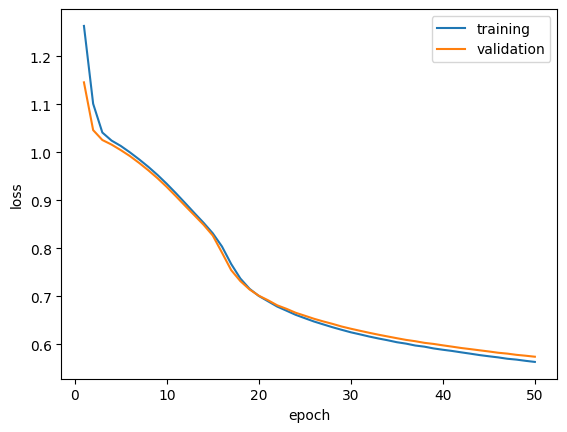

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [10]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.2081944  -0.12638952  0.05244909  0.5527918 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.24660896  0.46622622 -0.3413231  -0.19457649]
 [ 0.2564373   0.3206984  -0.16103232  0.37600023]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.35442698 -0.1635044  -0.2342795   0.39151198]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.37851548  0.7094527   0.2785681   0.17404768]]
fc1.bias 
 [ 0.02629578 -0.30978894  0.08459234 -0.46684736 -0.32715443 -0.3628641
  0.31546897  0.25444558 -0.22174752  0.16244563]
fc2.weight 
 [[ 0.20224684  0.31437248  0.12550516  0.04272011  0.21202639 -0.18619564
   0.05892716 -0.24517313 -0.21917309 -0.16335806]
 [ 0.14308454  0.04697707 -0.18731831  0.09553465  0.5412683   0.01000544
   0.01207406  0.04253311  0.1961803   0.5200713 ]
 [-0.24369256 -0.10029168  0.12428064  0.2620103   0.43496445  0.28478807
   0.0

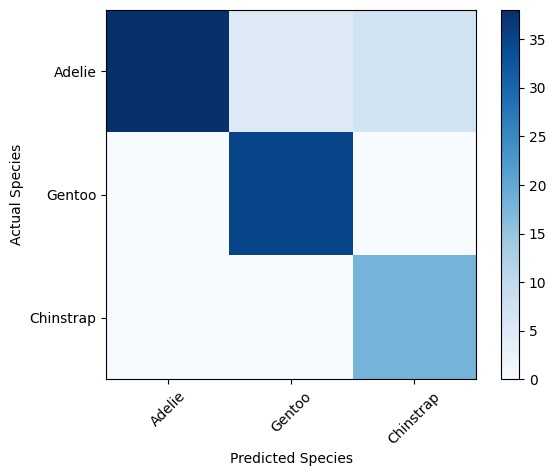

In [11]:
#Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix
import numpy as np

# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [14]:
# Save the model weights
model_file = '/content/drive/My Drive/CourseRA/Model/penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as /content/drive/My Drive/CourseRA/Model/penguin_classifier.pt


In [15]:
# New penguin features
x_new = [[50.4,15.3,20,50]]
print ('New sample: {}'.format(x_new))

# Create a new model class and load weights
model = PenguinNet()
model.load_state_dict(torch.load(model_file))

# Set model to evaluation mode
model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',penguin_classes[predicted.item()])

New sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo


<ipython-input-15-9fa3da390816>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_file))
